# DNA Damage model's Synthetic Data Preparation & Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings(action = 'ignore')

## 1. Preparing Cell Painting Data & Cell Health Data

### Load IDR-0080 Data & Cell Health Data
### Reference : https://pubmed.ncbi.nlm.nih.gov/33534641/

In [54]:
x_df = pd.read_csv('x_df.csv', index_col = None)
x_df = x_df.iloc[:, 1:]
x_df

,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_Orientation,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_3_3,Cells_AreaShape_Zernike_4_0,...,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_ER_5_0,Nuclei_Texture_SumEntropy_Mito_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_AGP_5_0,Nuclei_Texture_SumVariance_DNA_10_0,Nuclei_Texture_SumVariance_DNA_5_0,Nuclei_Texture_Variance_AGP_5_0,Nuclei_Texture_Variance_DNA_10_0,Nuclei_Texture_Variance_DNA_5_0
0,-0.155631,0.014646,0.188053,1.231056,0.031064,-0.585477,0.467976,0.254203,0.129446,0.027104,...,0.882859,0.841687,0.339831,0.562585,0.879950,0.904785,0.923143,0.944998,0.984938,0.961945
1,-0.247842,-0.030773,0.433778,0.062456,0.266860,0.838679,-0.467417,0.340793,-0.024450,0.418928,...,0.513820,0.344554,0.134318,0.018933,0.359496,0.557998,0.504751,0.407462,0.522251,0.519441
2,0.794740,0.743296,-0.438752,0.827288,-0.728499,-0.422394,-0.147624,0.083870,-0.160722,-0.363004,...,-0.456539,0.373750,-0.111184,-0.042733,-0.840771,-0.536215,-0.497296,-0.748232,-0.515240,-0.526734
3,0.480421,0.821096,-0.337898,0.054479,-0.662314,0.067979,0.025010,0.158138,-0.342062,-0.434783,...,0.115466,0.186411,0.249292,0.688435,-0.521766,0.124801,0.063444,-0.560178,-0.062851,0.026056
4,-0.074895,0.569377,0.571678,0.976504,-1.111947,1.348542,0.584906,-3.128483,-2.324773,1.945741,...,0.154802,2.975785,1.128414,-0.638839,0.753884,0.808944,0.594059,0.674015,0.140325,0.417465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.247953,0.331462,-0.228694,0.648857,-0.394799,-0.477804,-0.203016,0.387554,0.485502,-0.302333,...,0.305814,0.952718,0.697652,0.087784,0.266722,0.254346,0.367875,0.191115,0.220894,0.257950
353,1.455427,1.153796,-1.395398,1.167778,-1.413069,-0.684198,-0.923160,-0.145706,-0.535382,0.224011,...,-0.207834,-0.280317,-0.422648,-0.763835,-0.254697,-0.380000,-0.404530,-0.266026,-0.341998,-0.287431
354,0.719510,0.691270,-0.999921,0.701489,-0.965601,-0.937154,-0.218680,0.145943,-0.149745,-0.637266,...,0.011171,-0.575574,-0.272102,-0.101586,-0.117305,-0.083261,-0.085342,-0.213054,-0.126822,-0.101668
355,-0.255658,0.075113,0.999995,0.251456,0.237111,0.342004,0.084765,0.957639,-0.562746,-0.409896,...,0.766721,0.518347,1.450779,1.421830,1.483743,0.639279,0.614153,1.624128,0.523767,0.603819


In [55]:
# Load cell health data
y_all_df = pd.read_csv('cell_health_modz.tsv', sep = '\t')
y_df = y_all_df['cc_all_n_spots_h2ax_per_nucleus_area_mean']

# 1. Cell Health Labeling for Classification Model

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import random

# Fix random seeds for reproducibility
def set_seed(seed_value):
    np.random.seed(seed_value)
    random.seed(seed_value)
    tf.random.set_seed(seed_value)

# Set the seed
seed_value = 42
set_seed(seed_value)

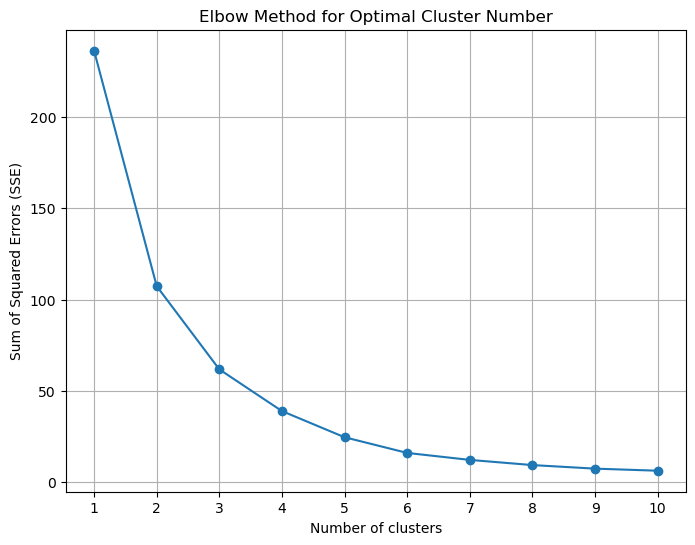

In [6]:
from sklearn.cluster import KMeans

# Create an array to store SSE values for different cluster numbers
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(y_df.values.reshape(-1, 1))
    sse.append(kmeans.inertia_)


# Plotting the elbow curve
plt.figure(figsize = (8,6))
plt.plot(range(1, 11), sse, marker = 'o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.savefig('Elbow Method.png')
plt.show()

In [56]:
# y_df Categorized

kmeans = KMeans(n_clusters = 6, random_state = 42)
y_clusters = kmeans.fit_predict(y_df.values.reshape(-1, 1))

y_df_binarized = y_clusters

In [57]:
from collections import Counter

Counter(y_df_binarized)

Counter({0: 117, 3: 94, 5: 90, 2: 38, 1: 13, 4: 5})

In [107]:
#y_df.sort_values(ascending = False).to_excel('y_df_1.xlsx')

In [58]:
# Remapping
mapping = {4: 0, 0: 0, 3: 0, 5: 0, 2: 1, 1: 1} # 0 : Low, 1: High
y_df_binarized = np.vectorize(mapping.get)(y_df_binarized)

In [101]:
Counter(y_df_binarized)

Counter({0: 306, 1: 51})

# 4. Classification Model Formation & Check Accuracy

## Synthetic Data Selection

In [103]:
x_df['dna'] = y_df_binarized

In [12]:
# Meatadata Detection
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

In [13]:
metadata.detect_from_dataframe(x_df)

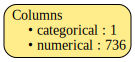

In [14]:
metadata.visualize(
    show_table_details='summarized'
)

In [15]:
from sdv.lite import SingleTablePreset
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer, TVAESynthesizer, CopulaGANSynthesizer

# Fast ML
synthesizer = SingleTablePreset(metadata, name='FAST_ML')
synthesizer.fit(x_df)

# GaussianCopula 
synthesizer_g = GaussianCopulaSynthesizer(metadata,
                                         enforce_min_max_values=True,
                                         enforce_rounding=True,
                                         default_distribution='gaussian_kde')
synthesizer_g.fit(x_df)


# CTGAN
synthesizer_c = CTGANSynthesizer(metadata,
                                enforce_min_max_values=True,
                                enforce_rounding=True,
                                epochs=500,
                                verbose=True)

synthesizer_c.fit(x_df)

# TAVE
synthesize_t = TVAESynthesizer(metadata,
                              epochs=500,
                              verbose=True)

synthesize_t.fit(x_df)

# CopulaGAN
synthesize_cc = CopulaGANSynthesizer(metadata,
                                    epochs=500,
                                    verbose=True)
synthesize_cc.fit(x_df)

PerformanceAlert: Using the CTGANSynthesizer on this data is not recommended. To model this data, CTGAN will generate a large number of columns.

Original Column Name                               Est # of Columns (CTGAN)
Cells_AreaShape_Compactness                        11
Cells_AreaShape_Eccentricity                       11
Cells_AreaShape_Extent                             11
Cells_AreaShape_Orientation                        11
Cells_AreaShape_Zernike_0_0                        11
Cells_AreaShape_Zernike_1_1                        11
Cells_AreaShape_Zernike_2_0                        11
Cells_AreaShape_Zernike_2_2                        11
Cells_AreaShape_Zernike_3_3                        11
Cells_AreaShape_Zernike_4_0                        11
Cells_AreaShape_Zernike_4_2                        11
Cells_AreaShape_Zernike_5_1                        11
Cells_AreaShape_Zernike_5_3                        11
Cells_AreaShape_Zernike_5_5                        11
Cells_AreaShape_Zernik

Gen. (-18.24) | Discrim. (1.00): 100%|██████████| 500/500 [48:06<00:00,  5.77s/it] 
Loss: -1555.797: 100%|██████████| 500/500 [09:15<00:00,  1.11s/it]


PerformanceAlert: Using the CTGANSynthesizer on this data is not recommended. To model this data, CTGAN will generate a large number of columns.

Original Column Name                               Est # of Columns (CTGAN)
Cells_AreaShape_Compactness                        11
Cells_AreaShape_Eccentricity                       11
Cells_AreaShape_Extent                             11
Cells_AreaShape_Orientation                        11
Cells_AreaShape_Zernike_0_0                        11
Cells_AreaShape_Zernike_1_1                        11
Cells_AreaShape_Zernike_2_0                        11
Cells_AreaShape_Zernike_2_2                        11
Cells_AreaShape_Zernike_3_3                        11
Cells_AreaShape_Zernike_4_0                        11
Cells_AreaShape_Zernike_4_2                        11
Cells_AreaShape_Zernike_5_1                        11
Cells_AreaShape_Zernike_5_3                        11
Cells_AreaShape_Zernike_5_5                        11
Cells_AreaShape_Zernik

Gen. (-4.20) | Discrim. (1.45): 100%|██████████| 500/500 [45:24<00:00,  5.45s/it]  


In [16]:
# Sample selection by disolve data imbalance
from sdv.sampling import Condition

c_1 = Condition(
    num_rows=5000,
    column_values={'dna' : 0}
)

c_2 = Condition(
    num_rows=5000,
    column_values={'dna' : 1}
)



# Fast ML
synthetic_data = synthesizer.sample_from_conditions(
    conditions=[c_1, c_2]
)

# GaussianCopula
synthetic_data_g = synthesizer_g.sample_from_conditions(
    conditions=[c_1, c_2]
)

# CTGAN
synthetic_data_c = synthesizer_c.sample_from_conditions(
    conditions=[c_1, c_2]
)

# TAVE
synthetic_data_t = synthesize_t.sample_from_conditions(
    conditions=[c_1, c_2]
)

# CopulaGAN
synthetic_data_cc = synthesize_cc.sample_from_conditions(
    conditions=[c_1, c_2]
)

Sampling conditions: 100%|██████████| 10000/10000 [12:08<00:00, 13.73it/s]


In [104]:
# Data balance Check
synthetic_data['dna'].value_counts()

dna
0    5000
1    5000
Name: count, dtype: int64

In [17]:
# Synthetic data structure validation
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=x_df,
    synthetic_data=synthetic_data,
    metadata=metadata
)


diagonstic_report = run_diagnostic(
    real_data=x_df,
    synthetic_data=synthetic_data_g,
    metadata=metadata
)

diagonistic_report = run_diagnostic(
    real_data=x_df,
    synthetic_data=synthetic_data_c,
    metadata=metadata
)

diagonistic_report = run_diagnostic(
    real_data=x_df,
    synthetic_data=synthetic_data_t,
    metadata=metadata
    
)

diagonistic_report = run_diagnostic(
    real_data=x_df,
    synthetic_data=synthetic_data_cc,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 737/737 [00:00<00:00, 1116.67it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 83.34it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 737/737 [00:00<00:00, 1420.04it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 333.41it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 737/737 [00:00<00:00, 1414.60it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 249.93it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 737/737 [00:00<00:00, 1330.33it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1

In [18]:
# Synthetic data structure validation
from sdv.evaluation.single_table import evaluate_quality



# Fast-ML
quality_report = evaluate_quality(
    real_data=x_df,
    synthetic_data=synthetic_data,
    metadata=metadata
)


# Copulan Gaussian
quality_report = evaluate_quality(
    real_data=x_df,
    synthetic_data=synthetic_data_g,
    metadata=metadata
)

# CTGAN
quality_report = evaluate_quality(
    real_data=x_df,
    synthetic_data=synthetic_data_c,
    metadata=metadata
)

# VAE
quality_report = evaluate_quality(
    real_data=x_df,
    synthetic_data=synthetic_data_t,
    metadata=metadata
    
)


# CopulaGAN
quality_report = evaluate_quality(
    real_data=x_df,
    synthetic_data=synthetic_data_cc,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 737/737 [00:07<00:00, 103.64it/s]|
Column Shapes Score: 87.64%

(2/2) Evaluating Column Pair Trends: |██████████| 271216/271216 [51:52<00:00, 87.13it/s]| 
Column Pair Trends Score: 99.35%

Overall Score (Average): 93.5%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 737/737 [00:04<00:00, 165.36it/s]|
Column Shapes Score: 94.35%

(2/2) Evaluating Column Pair Trends: |██████████| 271216/271216 [52:59<00:00, 85.30it/s]| 
Column Pair Trends Score: 96.01%

Overall Score (Average): 95.18%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 737/737 [00:12<00:00, 56.95it/s]|
Column Shapes Score: 68.56%

(2/2) Evaluating Column Pair Trends: |██████████| 271216/271216 [54:50<00:00, 82.42it/s]|  
Column Pair Trends Score: 82.31%

Overall Score (Average): 75.43%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 737/737 [00:04<00:00, 165.58it/s]|
Column Shapes Score: 81.75%


In [19]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=x_df,
    synthetic_data=synthetic_data_g,
    metadata=metadata,
    column_name='Cells_AreaShape_Orientation'
)

fig.show()

In [20]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=x_df,
    synthetic_data=synthetic_data_g,
    metadata=metadata,
    column_name='dna'
)

fig.show()

In [ ]:
# Synthetic Data Save
synthetic_data_g.to_csv('synthetic_data(gaussian copula).csv')
synthetic_data.to_csv('synthetic_data(FastML).csv')
synthetic_data_c.to_csv('synthetic_data(CTGAN).csv')
synthetic_data_t.to_csv('synthetic_data(TAVE).csv')
synthetic_data_cc.to_csv('synthetic_data(copulaGAN).csv')